In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [54]:
df_rad2 = pd.read_csv('lc_wasp80_rad2.csv')
df_radc = pd.read_csv('lc_wasp80_rad_change.csv')
df_rad2[:3]

,JD,tmag0,tmag_err,zeromag,color_coef,magzp,seeing,airmass,tmag
0,2.458229e+06,-10.405695,0.001644,0.000000,0.087811,26.199652,3.785,2.020,-10.405695
1,2.458247e+06,-10.660773,0.003462,0.283486,0.089203,26.250971,2.958,1.479,-10.377287
2,2.458250e+06,-9.948637,0.004896,-0.437517,0.094010,26.263258,5.623,1.341,-10.386154


In [56]:
df = df_rad2.dropna(how='all')
df = df[df['tmag0']!=0]

df0 = df_radc.dropna(how='all')
df0 = df0[df0['tmag0']!=0]

In [59]:
time0  = df0['JD'][df0['tmag0']!=0]
tmag0  = df0['tmag'][df0['tmag0']!=0]
utmag0 = df0['tmag_err'][df0['tmag0']!=0]
zmag0  = df0['zeromag'][df0['tmag0']!=0]
zmag_inst0 = df0['magzp'][df0['tmag0']!=0]
airmass0 = df0['airmass'][df0['tmag0']!=0]
seeing0  = df0['seeing'][df0['tmag0']!=0]
color0   = df0['color_coef'][df0['tmag0']!=0]

Text(0, 0.5, 'tmag')

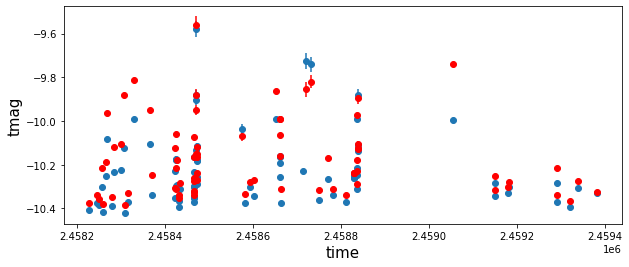

In [60]:
time  = df['JD'][df['tmag0']!=0]
tmag  = df['tmag'][df['tmag0']!=0]
utmag = df['tmag_err'][df['tmag0']!=0]
zmag  = df['zeromag'][df['tmag0']!=0]
zmag_inst = df['magzp'][df['tmag0']!=0]
airmass = df['airmass'][df['tmag0']!=0]
seeing  = df['seeing'][df['tmag0']!=0]
color   = df['color_coef'][df['tmag0']!=0]


plt.figure(figsize=(10,4))
plt.errorbar(time,tmag, yerr=utmag, fmt='o')
plt.errorbar(time0,tmag0, yerr=utmag0, fmt='o', c='red')
plt.xlabel('time',size=15)
plt.ylabel('tmag',size=15)

No handles with labels found to put in legend.


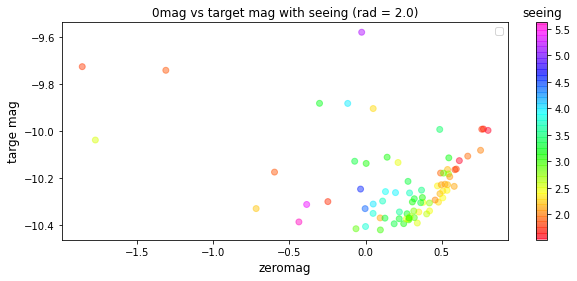

In [65]:
plt.figure(figsize=(10,4))
map1 = plt.scatter(zmag, tmag, c=seeing, cmap='gist_rainbow', alpha=0.45)
clb2 = plt.colorbar(map1)
clb2.ax.set_title('seeing')
plt.ylabel('targe mag', fontsize=12)
plt.xlabel('zeromag', fontsize=12)
plt.title('0mag vs target mag with seeing (rad = 2.0)')
plt.legend()

No handles with labels found to put in legend.


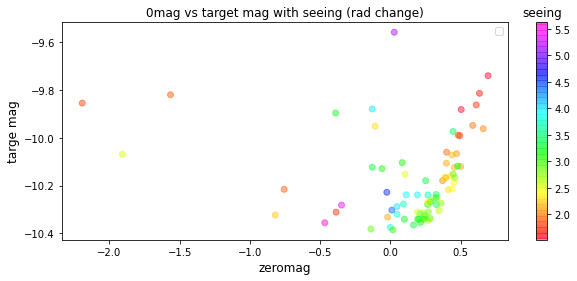

In [66]:
plt.figure(figsize=(10,4))
map2 = plt.scatter(zmag0, tmag0, c=seeing0, cmap='gist_rainbow', alpha=0.45)
clb2 = plt.colorbar(map2)
clb2.ax.set_title('seeing')
plt.ylabel('targe mag', fontsize=12)
plt.xlabel('zeromag', fontsize=12)
plt.title('0mag vs target mag with seeing (rad change)')
plt.legend()

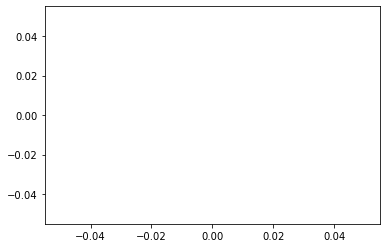

In [7]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(time, tmag).autopower()
plt.plot(frequency, power)

In [15]:
time_off = time - time[0]

In [ ]:
f = np.linspace(0.05, 1, 100)
pgram = []
pgram = signal.lombscargle(df_cut_mag[k]['time'], df_cut_mag[k]['mag'], f)
plt.plot(1/f, pgram, label=str(k))
plt.xlim(0.8,7.5)
plt.legend()

In [33]:
tmag_off = tmag - np.min(tmag)
time_off = time - time[0]

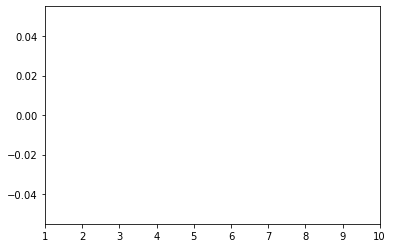

In [38]:
f = np.linspace(0.1, 1, 100)
pgram = []
pgram = signal.lombscargle(time_off, tmag_off, f)
plt.plot(1/f, pgram)
plt.xlim(1,10)
plt.show()

In [47]:
df = df.dropna(how='all')
df = df[df['tmag0']!=0]

nan


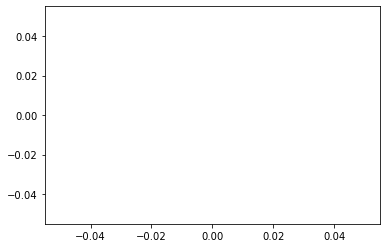

In [51]:
freq3 = []
pow3 = []
freq3, pow3 = LombScargle(df['JD'], df['tmag'], df['tmag_err']).autopower(minimum_frequency=0.5, maximum_frequency=1,samples_per_peak=5)

plt.plot(1/freq3, pow3)
print(pow3.max())  
#plt.xlim(0,10)
#plt.legend()